# """Linear Regression on Head Brain Dataset"""

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams['figure.figsize']=(20.0,10.0)

In [5]:
data = pd.read_csv('headbrain.csv')

In [6]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [10]:
X = data.iloc[:,-2].values
Y = data.iloc[:,-1].values

In [11]:
print(X,Y)

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

In [12]:
#Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [13]:
print(mean_x,mean_y,sep=" ")

3633.9915611814345 1282.873417721519


In [17]:
# Total no. of values
m = len(X)
print(m)

237


In [18]:
# Using the formula to calculate b0 and b1
num = 0
deno = 0
for i in range(m):
    num += (X[i]-mean_x)*(Y[i]-mean_y)
    deno += (X[i]-mean_x)**2
b1 = num/deno
b0 = mean_y-(b1*mean_x)

# Print Coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


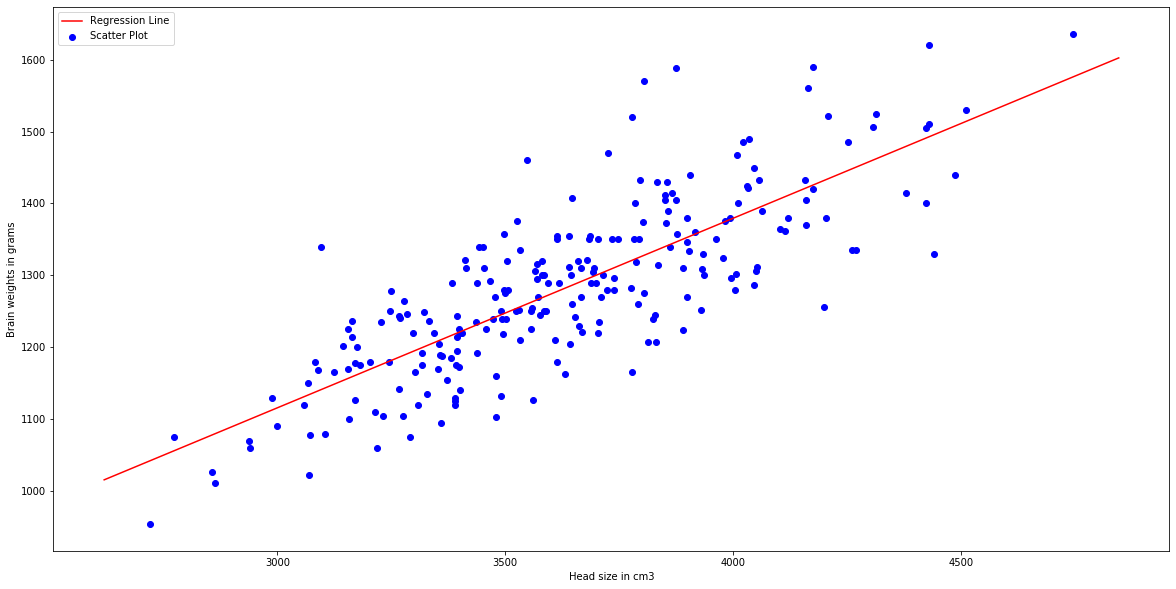

In [19]:
# Plotting values and Regression Line

max_x = np.max(X)+100
min_x = np.min(X)-100

# Calculating line values x and y

x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x

# Ploting line
plt.plot(x,y, color='red', label='Regression Line')

# Ploting Scatter plot
plt.scatter(X,Y, color='blue', label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weights in grams')
plt.legend()
plt.show()

In [20]:
ss_t=0  #Total sum of Square
ss_r=0  #Total sum of residuals
for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [24]:
 """Using sklearn """
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use rank 1 matrix in scikit learn
X = X.reshape((m,1))

# Creating model
lr = LinearRegression()

#Fitting training data
lr = lr.fit(X,Y)
# Y prediction
y_pred = lr.predict(X)
print(y_pred)
score = lr.score(X,y_pred)
print(score)

[1514.16660083 1310.27229206 1448.04583661 1320.5460363  1425.9177721
 1269.96760312 1322.65347102 1263.11844029 1277.34362462 1374.5490509
 1232.56063691 1377.44677363 1284.45621679 1434.08408162 1335.03464997
 1346.62554091 1246.78582124 1238.61951172 1140.88722677 1490.98481895
 1347.15239959 1391.40852862 1327.65862847 1302.89627056 1576.07249561
 1490.72138961 1388.77423523 1385.08622448 1235.45835965 1425.39091342
 1323.1803297  1325.55119375 1406.42400097 1421.70290266 1420.91261465
 1330.29292186 1254.68870143 1312.90658546 1203.84683891 1245.46867455
 1369.28046411 1248.89325596 1462.27102095 1327.65862847 1343.2009595
 1388.24737655 1460.42701557 1159.32728053 1284.71964613 1285.50993415
 1350.576981   1324.76090573 1450.41670067 1395.88682739 1382.45193108
 1236.512077   1350.31355166 1423.02004936 1362.16787194 1292.09566764
 1343.99124752 1219.38916994 1495.72654706 1445.9384019  1307.37456933
 1202.52969221 1225.18461541 1213.85715381 1492.56539499 1479.65735735
 1381.398

In [25]:
# Calculating RMSE and R2 score
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
r2_score = lr.score(X,Y)
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957
